In [2]:
import numpy as np
with np.load("1_KS_cpc_weights.npz") as data:
    a = data['data'][0]

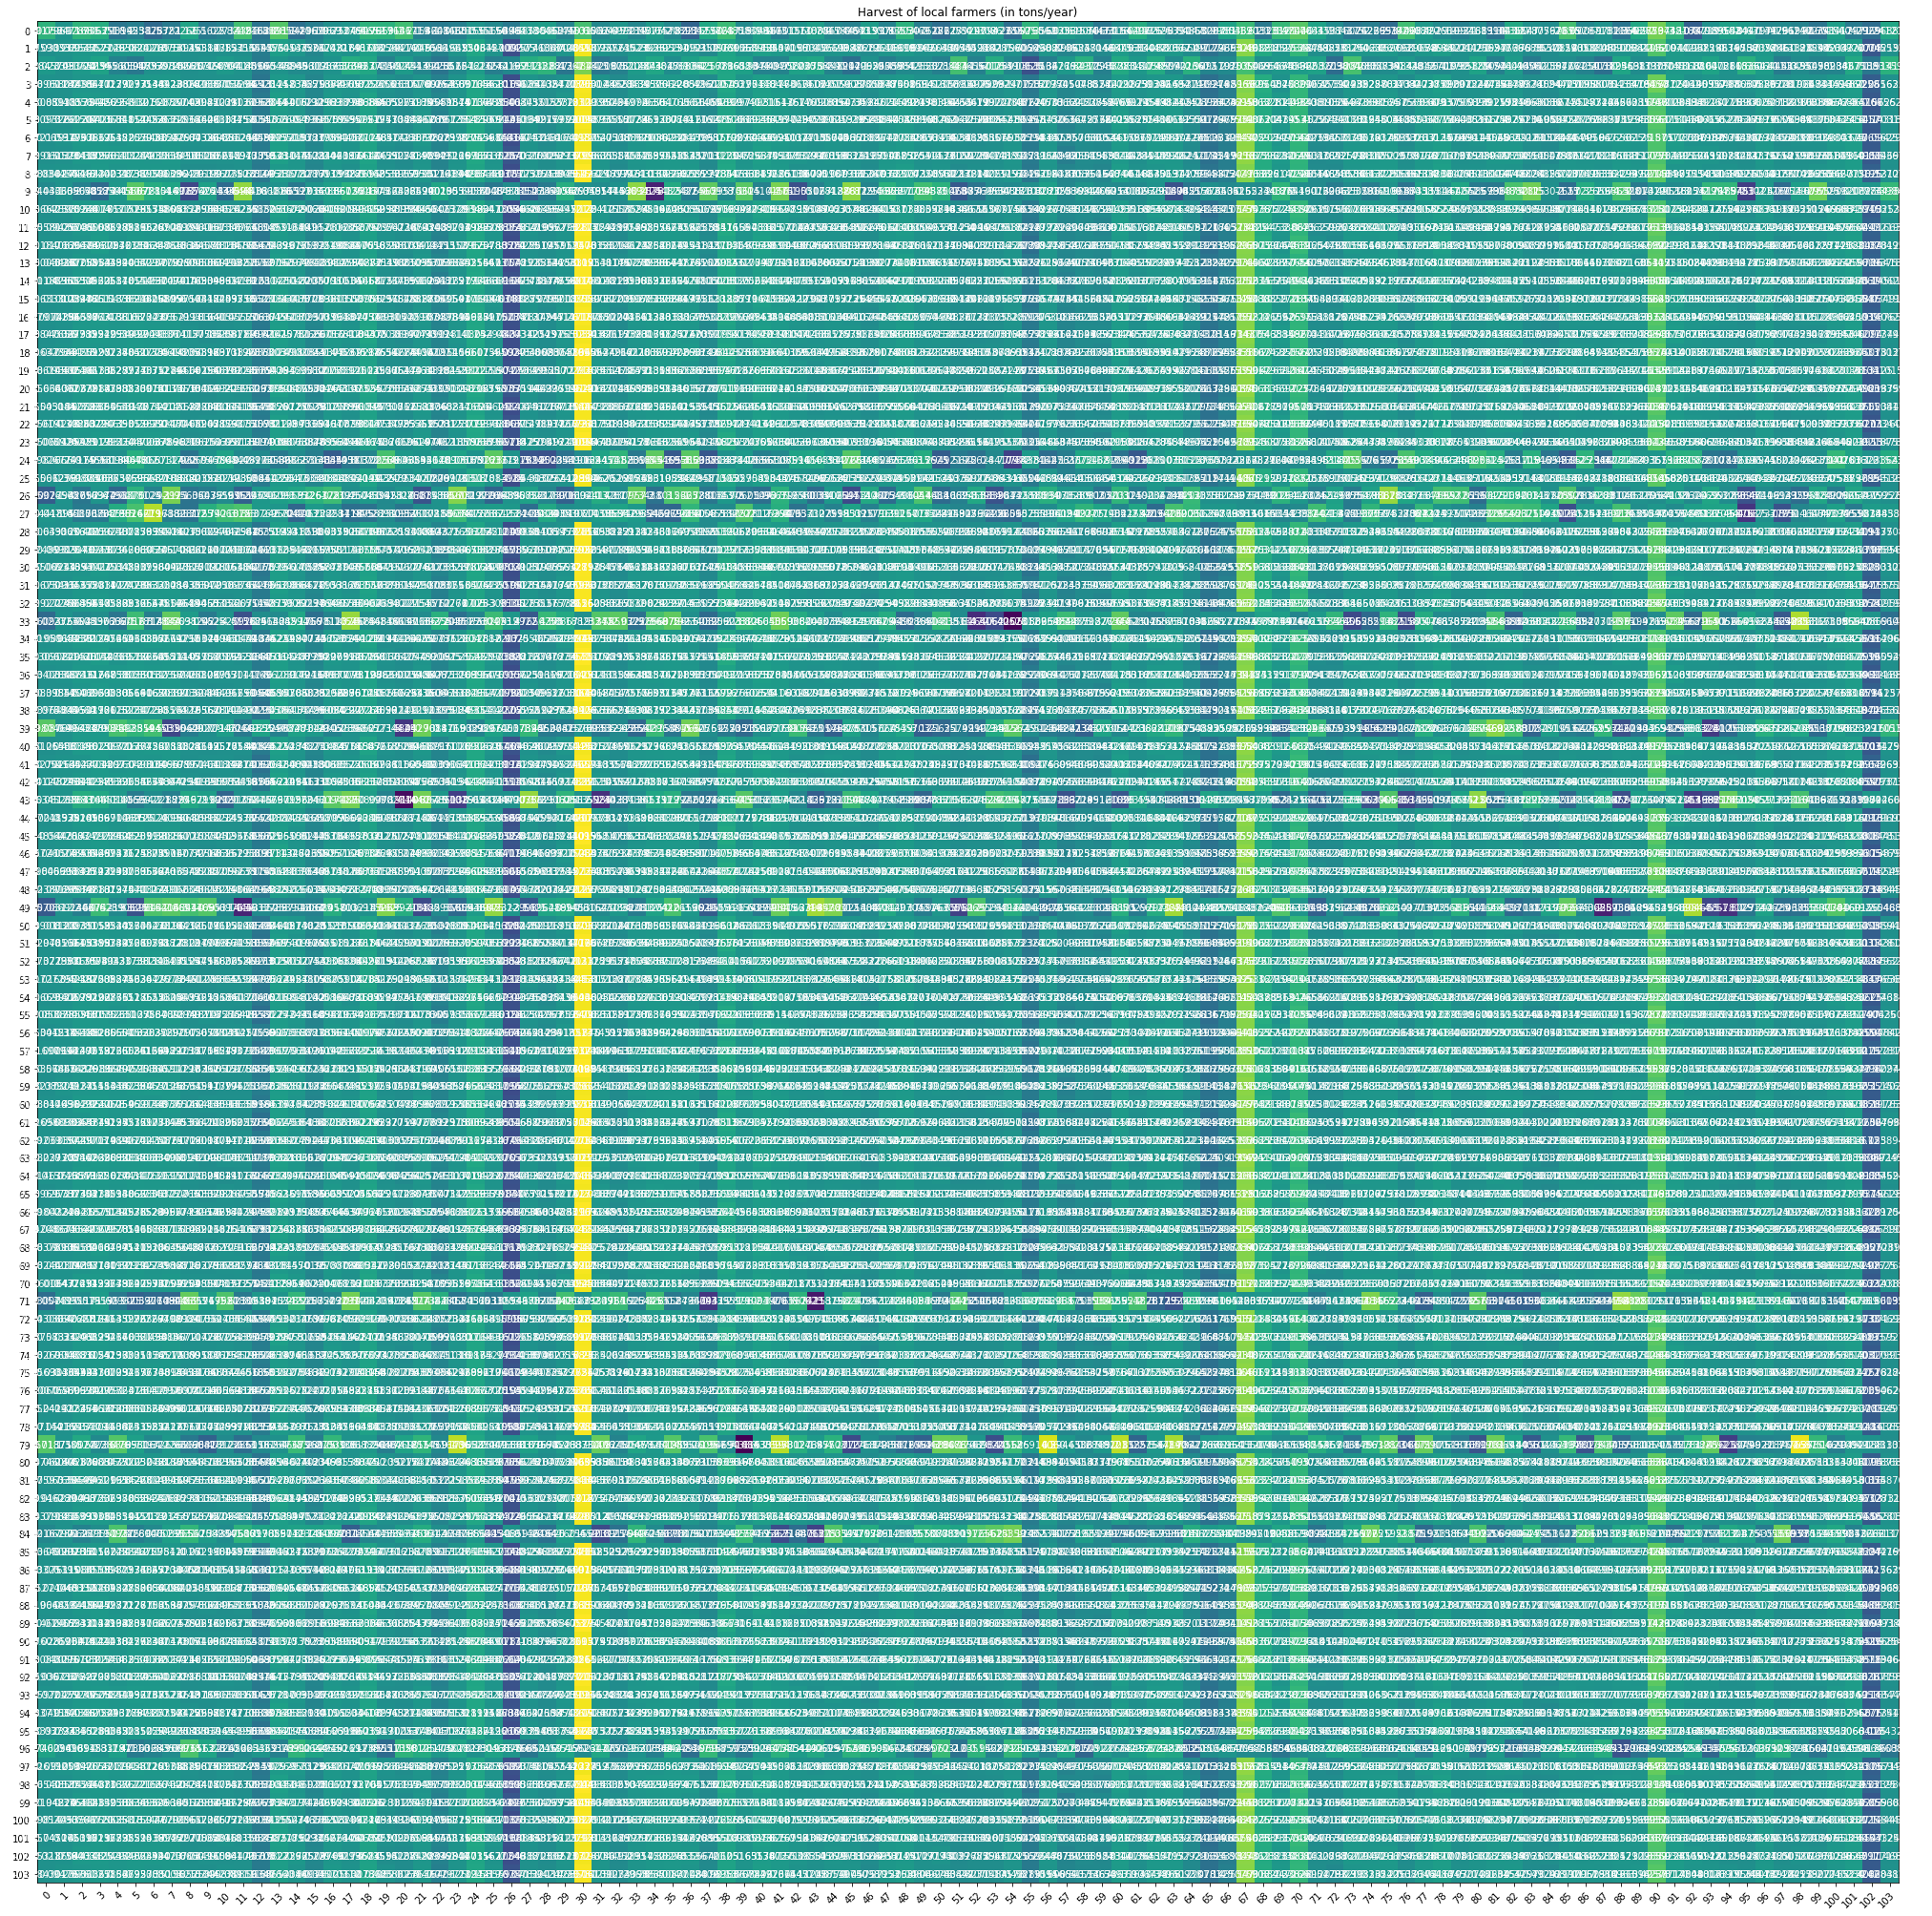

In [5]:
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt

# # vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
# #               "potato", "wheat", "barley"]
# # farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
# #            "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

# vegetables = np.arange(len(a))
# farmers = np.arange(len(a))
# # harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
# #                     [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
# #                     [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
# #                     [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
# #                     [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
# #                     [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
# #                     [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

# harvest = a

# fig, ax = plt.subplots(figsize=(28, 28))
# im = ax.imshow(harvest)

# # # Show all ticks and label them with the respective list entries
# # ax.set_xticks(np.arange(len(farmers)), labels=farmers)
# # ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# ax.set_xticks(np.arange(len(farmers)))
# ax.set_yticks(np.arange(len(vegetables)))

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")

# ax.set_title("Harvest of local farmers (in tons/year)")
# fig.tight_layout()
# plt.show()

In [5]:
import numpy as np
with np.load("1_KS_cpc_weights.npz") as data:
    a = data['data'][0]

In [8]:
### https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html


import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def heatmap(data, ax=None, cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [9]:
fig, ax = plt.subplots(figsize=(28, 28))

im, cbar = heatmap(a, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")


fig.tight_layout()
plt.show()

KeyboardInterrupt: 

In [17]:
import numpy as np
with np.load("1_KS_cpc_weights_t1_p01.npz") as data:
    a = data['data'][0]

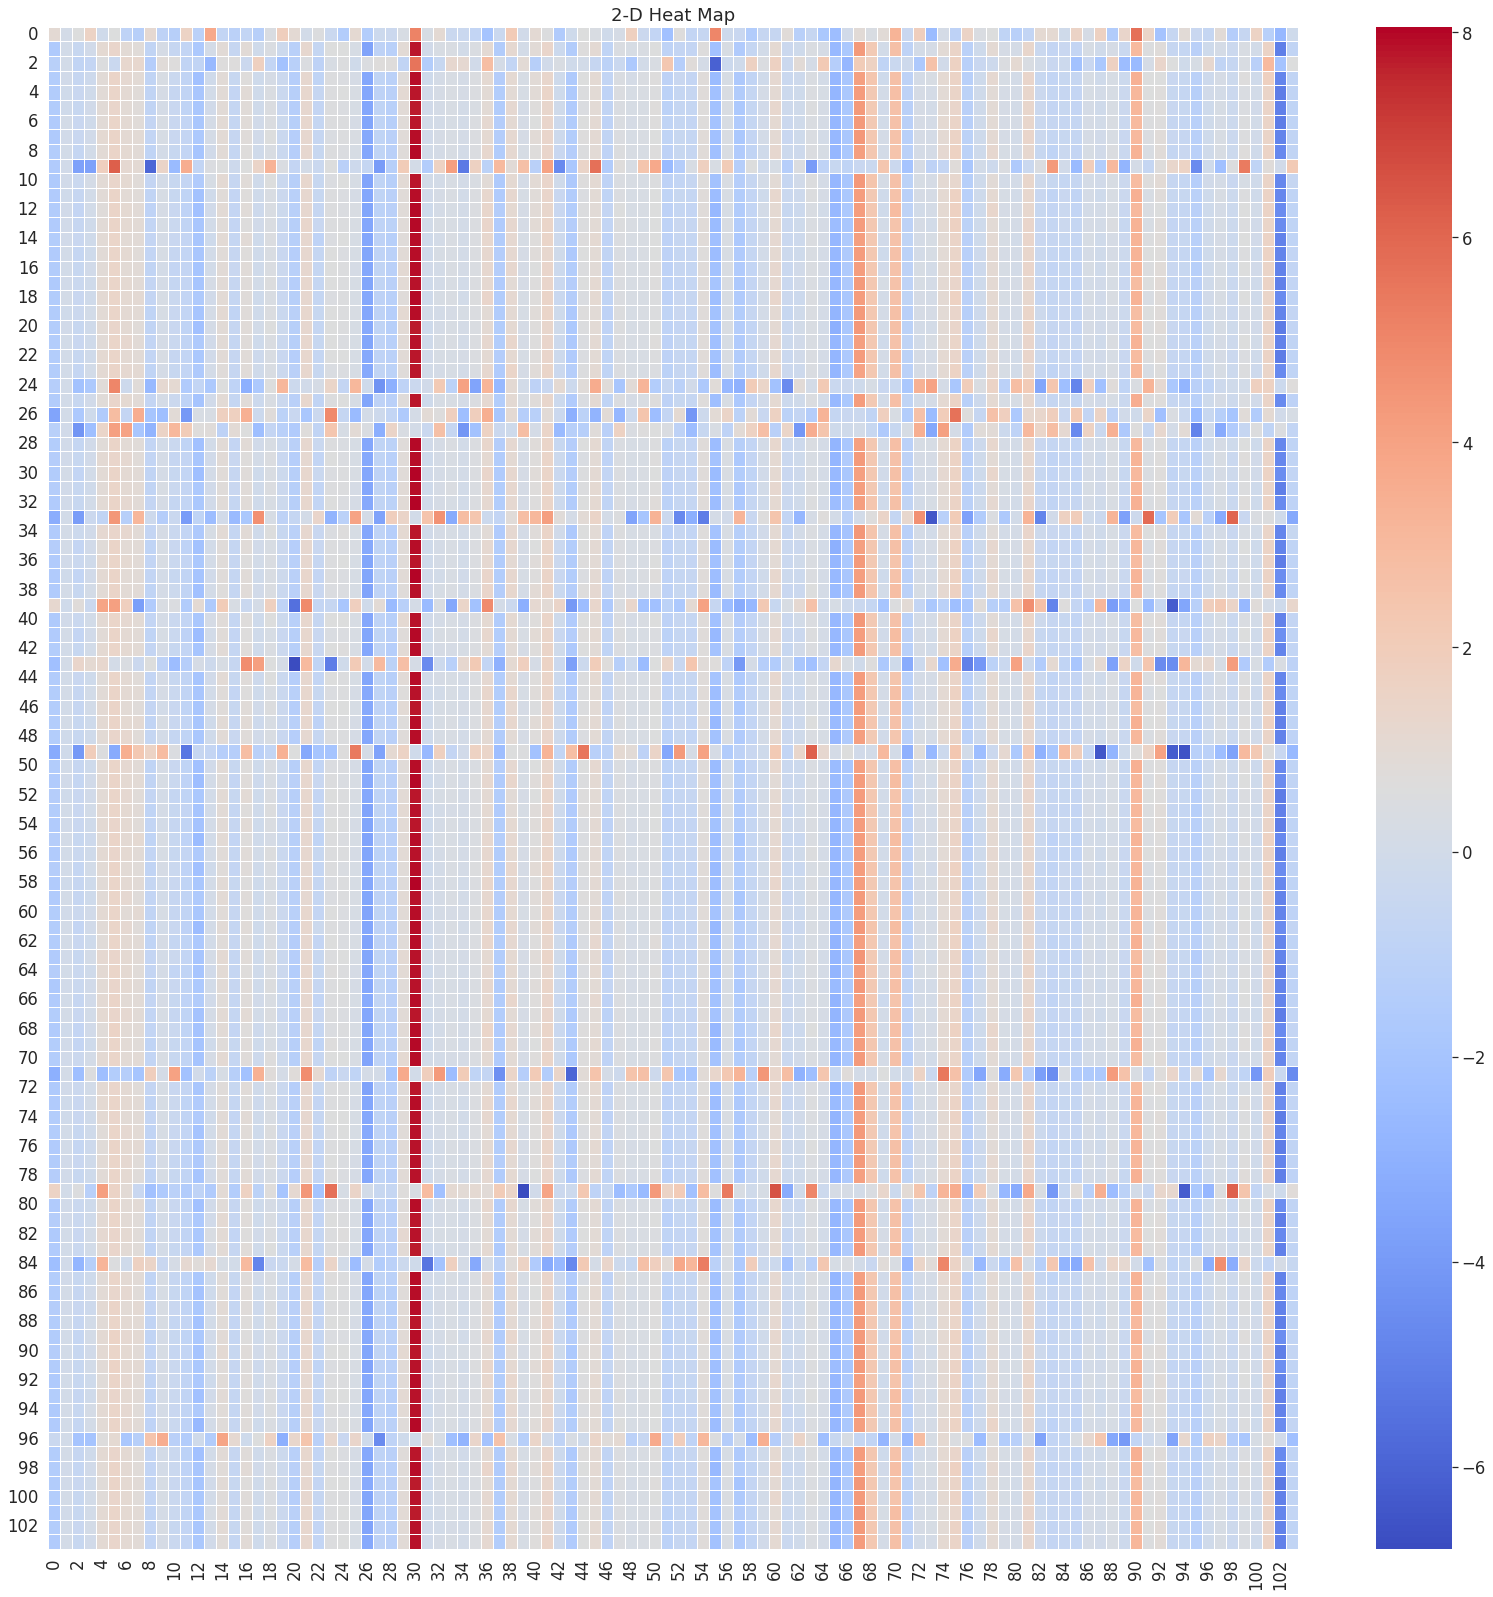

In [16]:
import numpy as np
import seaborn as sns
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

plt.figure(figsize = (28,28))


data_set = a
heatmap_plots = sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()
sns.set(font_scale=1.2) 
# plt.savefig("output.png", dpi=300)


fig = heatmap_plots.get_figure()
fig.savefig("output.png", dpi=300) 


In [10]:
# import numpy as np
# import seaborn as sns
# # import matplotlib.pylab as plt
# import matplotlib.pyplot as plt

# plt.figure(figsize = (28,28))


# data_set = a
# sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
# plt.title( "2-D Heat Map" )
# plt.show()
# plt.savefig("output.png", dpi=300)


In [2]:
import numpy as np
with np.load("1_KS_hubert_weights.npz") as data:
    a = data['data'][0]

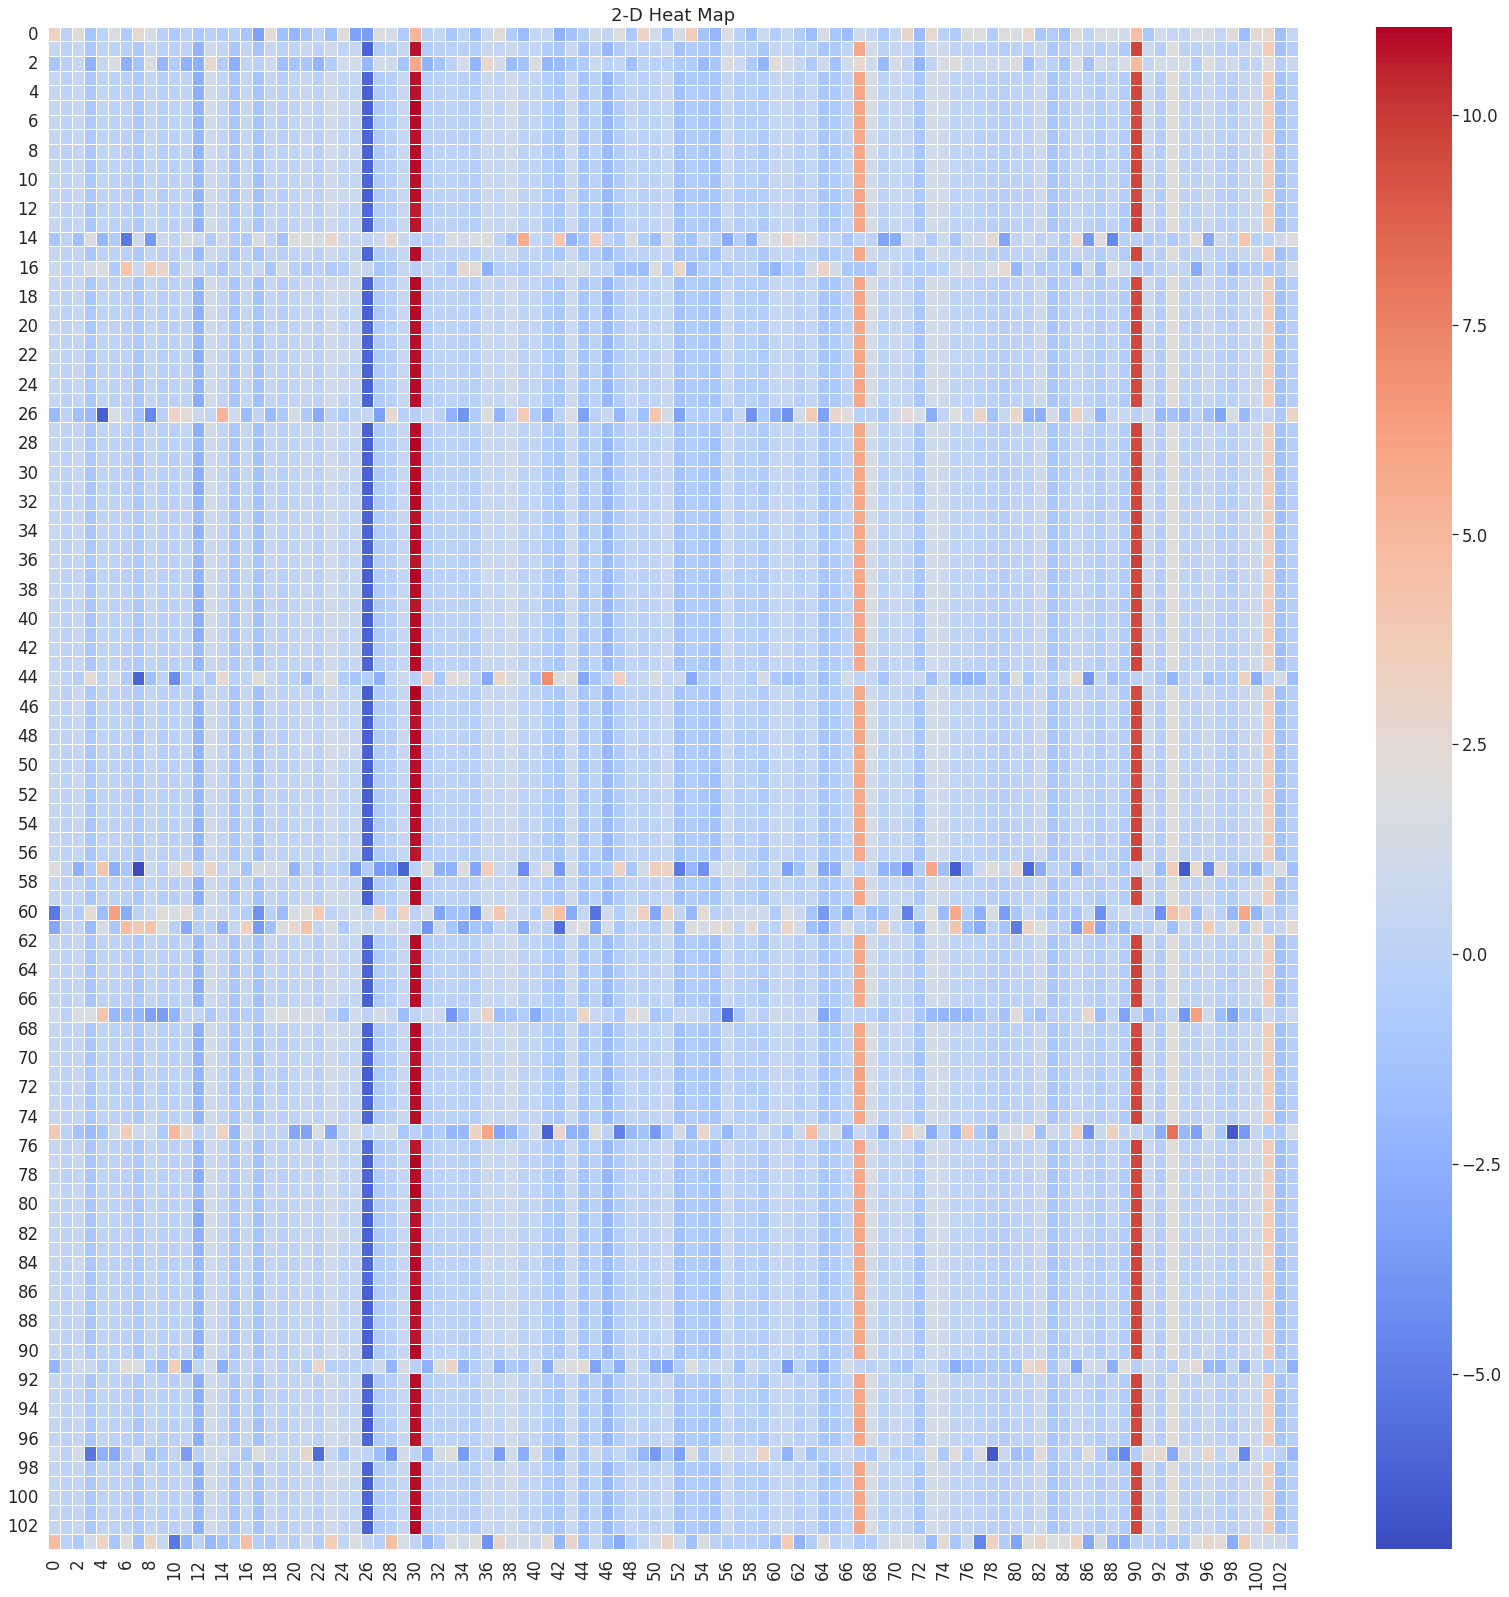

In [5]:
import numpy as np
import seaborn as sns
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

plt.figure(figsize = (28,28))


data_set = a
heatmap_plots = sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()
sns.set(font_scale=2.0) 
# plt.savefig("output.png", dpi=300)


fig = heatmap_plots.get_figure()
fig.savefig("output_hubert.png", dpi=300) 


In [8]:
import numpy as np
with np.load("1_IC_hubert_weights.npz") as data:
    a = data['data'][0]

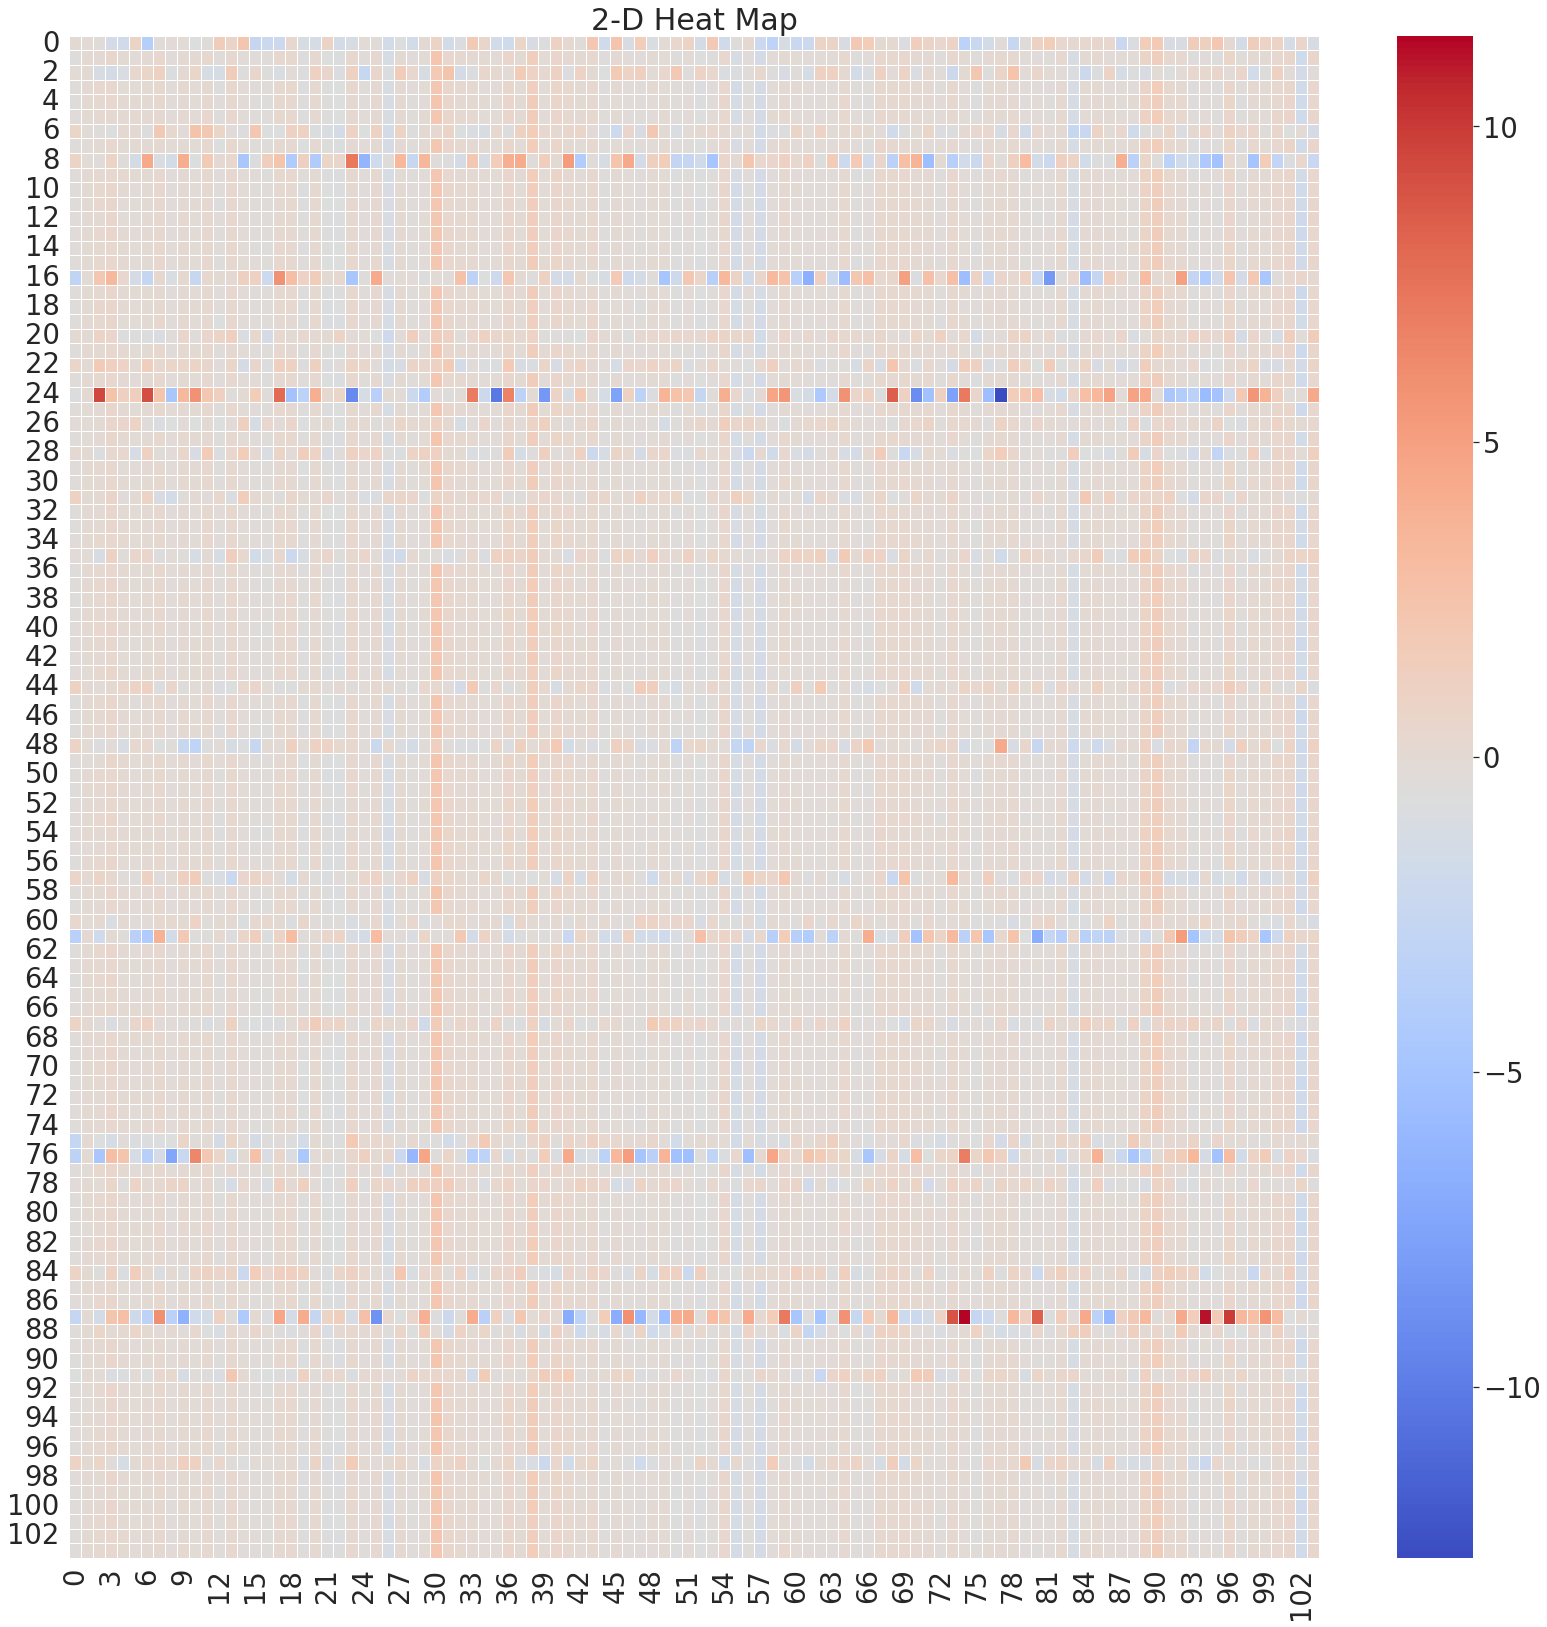

In [10]:
import numpy as np
import seaborn as sns
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

plt.figure(figsize = (28,28))


data_set = a
heatmap_plots = sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()
sns.set(font_scale=2.5) 
# plt.savefig("output.png", dpi=300)


fig = heatmap_plots.get_figure()
fig.savefig("1_IC_hubert_weights.png", dpi=300) 


In [13]:
import numpy as np
with np.load("1_IC_cpc_weights.npz") as data:
    a = data['data'][0]

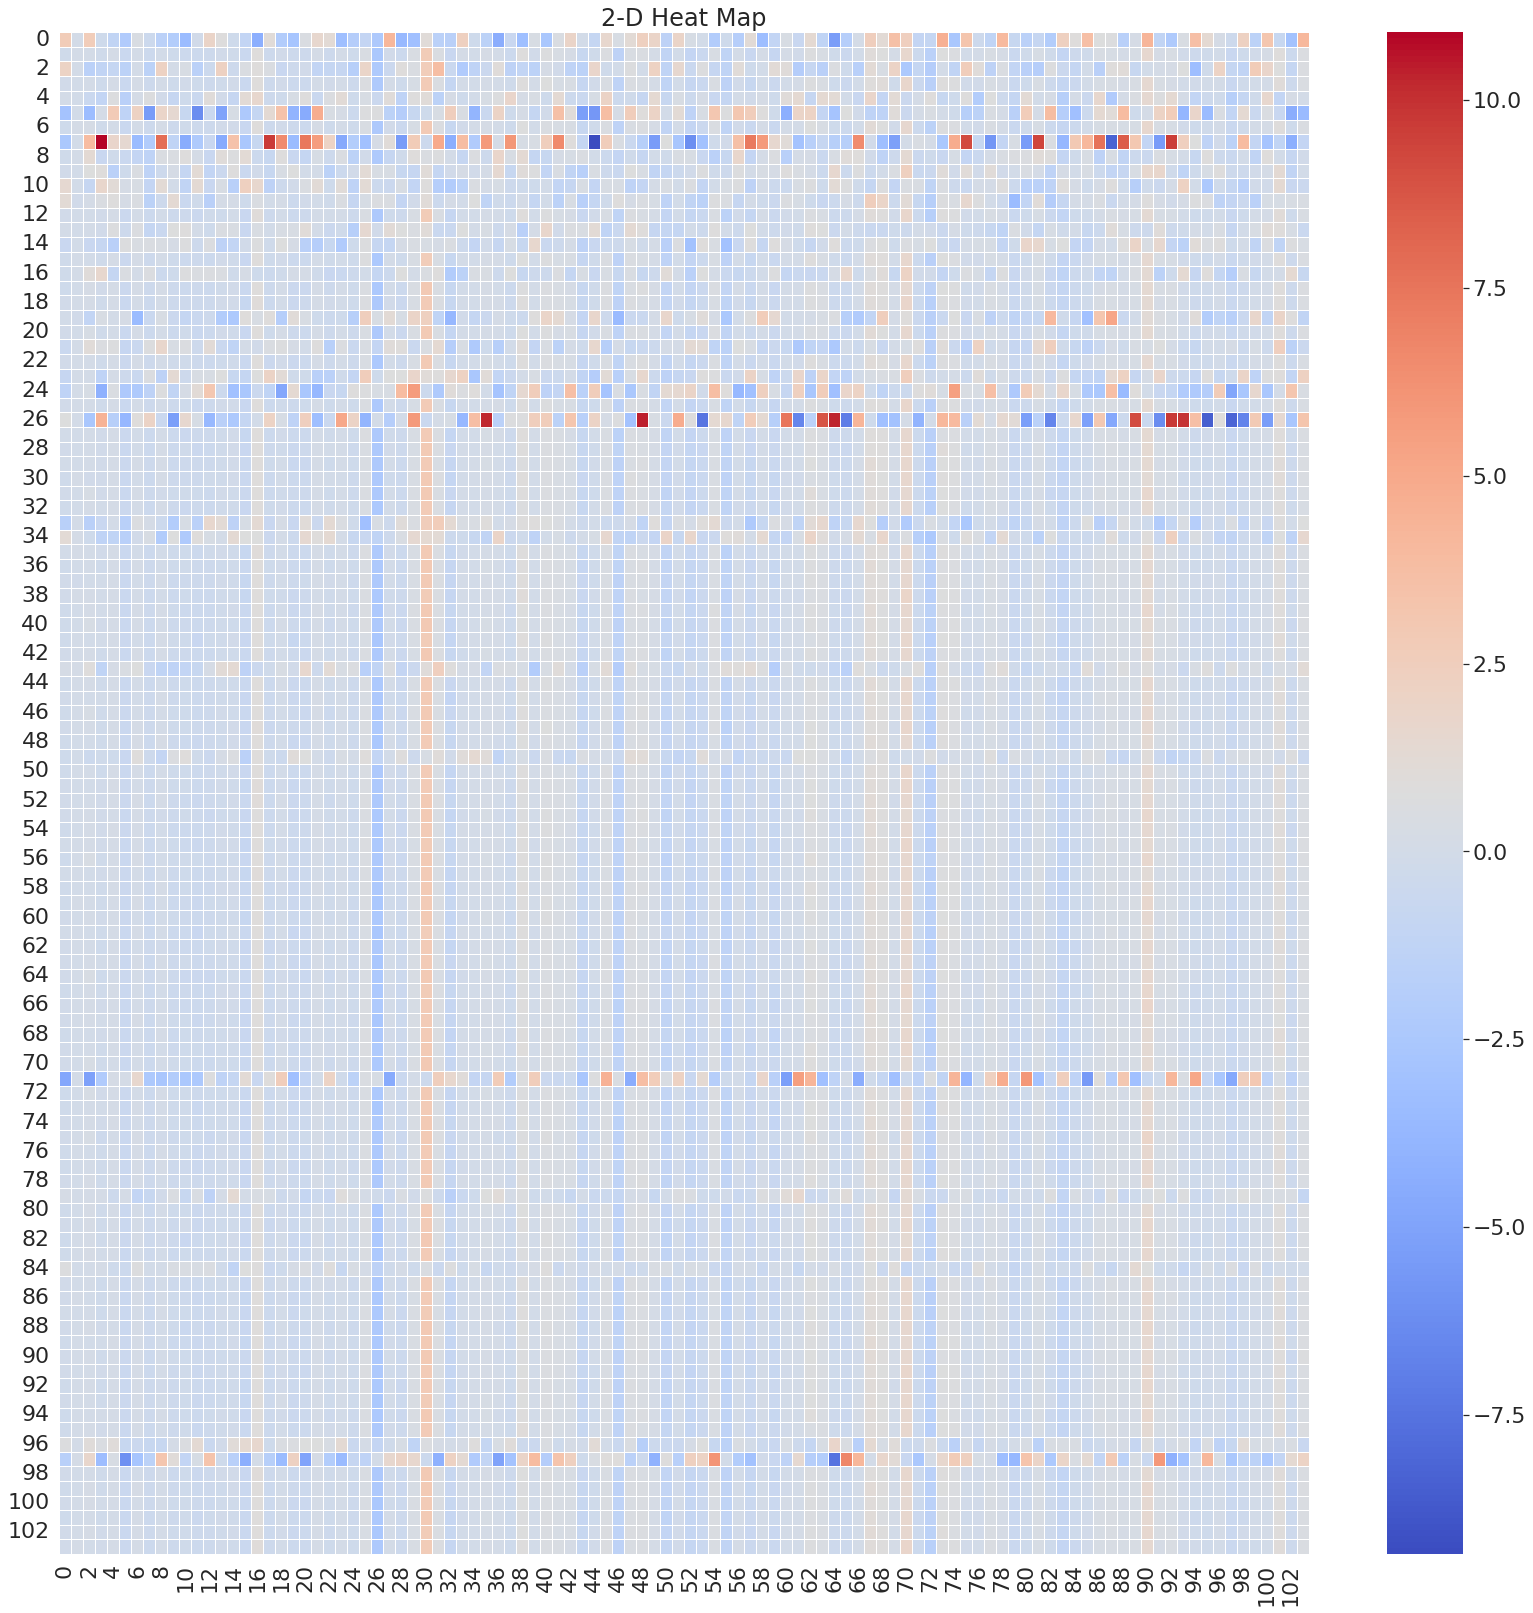

In [14]:
import numpy as np
import seaborn as sns
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

plt.figure(figsize = (28,28))


data_set = a
heatmap_plots = sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()
sns.set(font_scale=2.0) 
# plt.savefig("output.png", dpi=300)


fig = heatmap_plots.get_figure()
fig.savefig("1_IC_cpc_weights.png", dpi=300) 


In [ ]:
import numpy as np
from pylab import plt
import datetime as dt
from scipy.interpolate import spline
from matplotlib import dates

x = np.array([dt.date(2000, 11, 30), dt.date(2001, 3, 31), dt.date(2001, 11, 30),
                dt.date(2002, 3, 31), dt.date(2002, 11, 30), dt.date(2003, 3, 31),
                dt.date(2003, 11, 30), dt.date(2004, 3, 31), dt.date(2004, 11, 30),
                dt.date(2005, 3, 31), dt.date(2005, 11, 30), dt.date(2006, 3, 31),
                dt.date(2006, 11, 30), dt.date(2007, 3, 31), dt.date(2007, 11, 30),
                dt.date(2008, 3, 31), dt.date(2008, 11, 30), dt.date(2009, 3, 31),
                dt.date(2009, 11, 30), dt.date(2010, 3, 31), dt.date(2010, 11, 30),
                dt.date(2011, 3, 31), dt.date(2011, 11, 30)])

y = np.array([0, -2.15881, -1.18881, -2.91211,  -2.33211,   -5.06131, -4.24131, -6.04321,
               -4.56321,   -6.42431,   -5.68431, -8.83711,   -8.43711,   -11.02821,
               -10.66821,    -12.90341,  -11.02341,  -13.77671,  -13.27671,  -13.89671,
               -12.23671,    -13.89411,  -12.61411])

# create an array of numbers for the dates
x_dates = np.array([dates.date2num(i) for i in x])

plt.figure()
plt.plot(x, y)
plt.show()

# create more uniform intervals in x axis and use spline to interpolate data
x_smooth = np.linspace(x_dates.min(), x_dates.max(), 200)
y_smooth = spline(x_dates, y, x_smooth)

# creating a new date array from the new date number array
x_new = np.array([dates.num2date(i) for i in x_smooth])

plt.figure()
plt.plot(x_new, y_smooth)
plt.show()

In [ ]:
import numpy as np
from pylab import plt
import datetime as dt
from scipy.interpolate import spline
from matplotlib import dates

# x = np.array([dt.date(2000, 11, 30), dt.date(2001, 3, 31), dt.date(2001, 11, 30),
#                 dt.date(2002, 3, 31), dt.date(2002, 11, 30), dt.date(2003, 3, 31),
#                 dt.date(2003, 11, 30), dt.date(2004, 3, 31), dt.date(2004, 11, 30),
#                 dt.date(2005, 3, 31), dt.date(2005, 11, 30), dt.date(2006, 3, 31),
#                 dt.date(2006, 11, 30), dt.date(2007, 3, 31), dt.date(2007, 11, 30),
#                 dt.date(2008, 3, 31), dt.date(2008, 11, 30), dt.date(2009, 3, 31),
#                 dt.date(2009, 11, 30), dt.date(2010, 3, 31), dt.date(2010, 11, 30),
#                 dt.date(2011, 3, 31), dt.date(2011, 11, 30)])

# y = np.array([0, -2.15881, -1.18881, -2.91211,  -2.33211,   -5.06131, -4.24131, -6.04321,
#                -4.56321,   -6.42431,   -5.68431, -8.83711,   -8.43711,   -11.02821,
#                -10.66821,    -12.90341,  -11.02341,  -13.77671,  -13.27671,  -13.89671,
#                -12.23671,    -13.89411,  -12.61411])


x = np.array([0.1, 0.2, 0.4, 0.6, 0.8])

y = np.array([91.30, 90.65, 89.74, 92.28, 90.94])



# create an array of numbers for the dates
x_dates = np.array([dates.date2num(i) for i in x])

plt.figure()
plt.plot(x, y)
plt.show()

# create more uniform intervals in x axis and use spline to interpolate data
x_smooth = np.linspace(x_dates.min(), x_dates.max(), 200)
y_smooth = spline(x_dates, y, x_smooth)

# creating a new date array from the new date number array
x_new = np.array([dates.num2date(i) for i in x_smooth])

plt.figure()
plt.plot(x_new, y_smooth)
plt.show()

ImportError: cannot import name 'spline' from 'scipy.interpolate' (/home/ec2-user/.local/lib/python3.9/site-packages/scipy/interpolate/__init__.py)

In [ ]:
import numpy as np
from pylab import plt
import datetime as dt
from scipy.interpolate import spline
from matplotlib import dates


import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


# x = np.array([0.1, 0.2, 0.4, 0.6, 0.8])
# y = np.array([91.30, 90.65, 89.74, 92.28, 90.94])



# x = np.linspace(0, 10, num=11, endpoint=True)
# y = np.cos(-x**2/9.0)


x = np.array([0.1, 0.2, 0.4, 0.6, 0.8])
y = np.array([91.30, 90.65, 89.74, 92.28, 90.94])


f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='zero')
f3 = interp1d(x, y, kind='quadratic')

xnew = np.linspace(x.min(), x.max(), num=1001, endpoint=True)
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'zero', 'quadratic'], loc='best')
plt.show()



ImportError: cannot import name 'spline' from 'scipy.interpolate' (/home/ec2-user/.local/lib/python3.9/site-packages/scipy/interpolate/__init__.py)

In [ ]:



# create an array of numbers for the dates
x_dates = np.array([dates.date2num(i) for i in x])

plt.figure()
plt.plot(x, y)
plt.show()

# create more uniform intervals in x axis and use spline to interpolate data
x_smooth = np.linspace(x_dates.min(), x_dates.max(), 200)
y_smooth = spline(x_dates, y, x_smooth)

# creating a new date array from the new date number array
x_new = np.array([dates.num2date(i) for i in x_smooth])

plt.figure()
plt.plot(x_new, y_smooth)
plt.show()